Дипломная работа по курсу «Python для анализа данных»

Загрузить файл hr.csv (можно найти во сложении к заданию)\
Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)\
Рассчитать и визуализировать корреляционную матрицу для переменных\
Визуализировать несколько взаимосвязей между переменными\
С использованием t-test статистики проверить взаимосвязи между несколькими переменными\
Рассчитать сколько работников работает в каждом департаменте\
Показать распределение сотрудников по зарплатам\
Показать распределение сотрудников по зарплатам совместно с департаментами\
Сколько сотрудников покинули компанию\
Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию\
Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import researchpy as rp

In [27]:
data = pd.read_csv('hr.csv')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


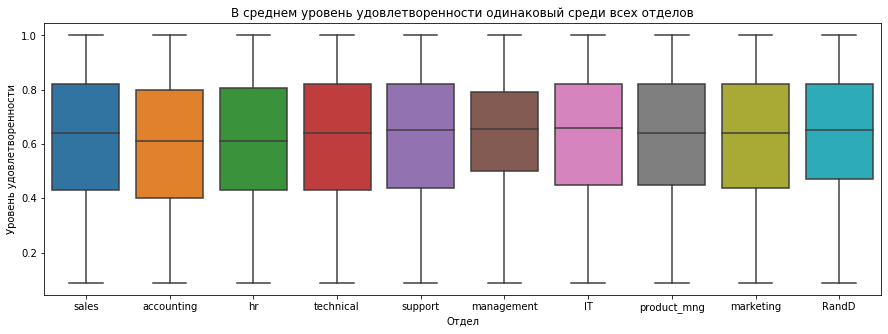

In [24]:
plt.rcParams['figure.figsize']=(15,5)
ax = sns.boxplot(x="sales", y="satisfaction_level", data=data)
_ = plt.xlabel('Отдел')
_ = plt.ylabel('Уровень удовлетворенности')
_ = plt.title('В среднем уровень удовлетворенности одинаковый среди всех отделов')

In [4]:
data.describe()  # расчет основных статистик для переменных

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [29]:
data.select_dtypes(include=['object','int64']).mode().head(1)  # расчет моды для дискретных переменных

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,4.0,135,3.0,0.0,0.0,0.0,sales,low


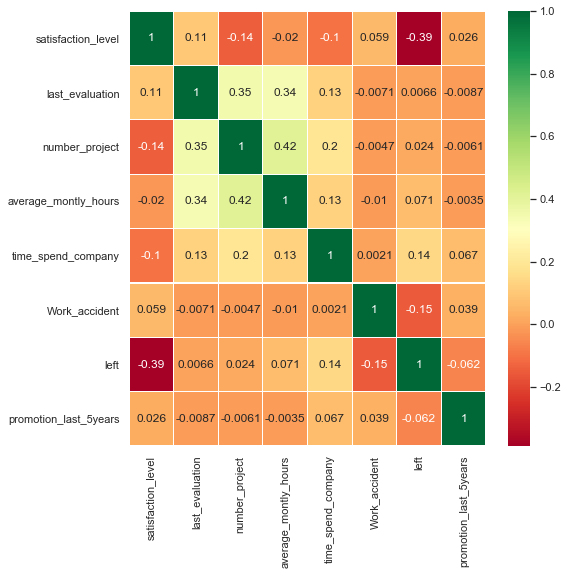

In [39]:
# строим матрицу корреляций data.corr()

sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()    # gcf() - получение текущей фигуры
fig.set_size_inches(8,8)  # set_size_inches() - устанавливаем размер фигуры
plt.show()

In [22]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
# сколько работников работает в каждом департаменте
data.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [53]:
# сколько сотрудников покинули компанию

left = data[data['left']==1].left.value_counts()
print(f'{left.iloc[0]} сотрудник покинул компанию')

3571 сотрудник покинул компанию


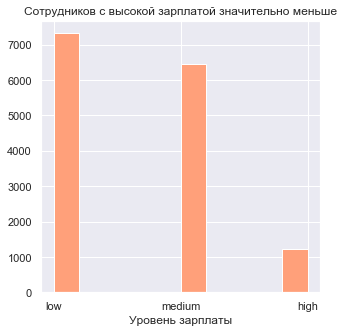

In [85]:
# распределение сотрудников по зарплатам
salary = data.salary
plt.figure(figsize=(5,5))
plt.hist(salary, color='lightsalmon')
_ = plt.xlabel('Уровень зарплаты')
_ = plt.title('Сотрудников с высокой зарплатой значительно меньше')

In [57]:
salary_by_dept = data[['salary','sales']]
salary_by_dept['qty'] = 1
salary_by_dept.columns = ['department','salary','qty']

pivot_df = salary_by_dept.pivot_table(index='salary', columns='department', values='qty', aggfunc=np.sum)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


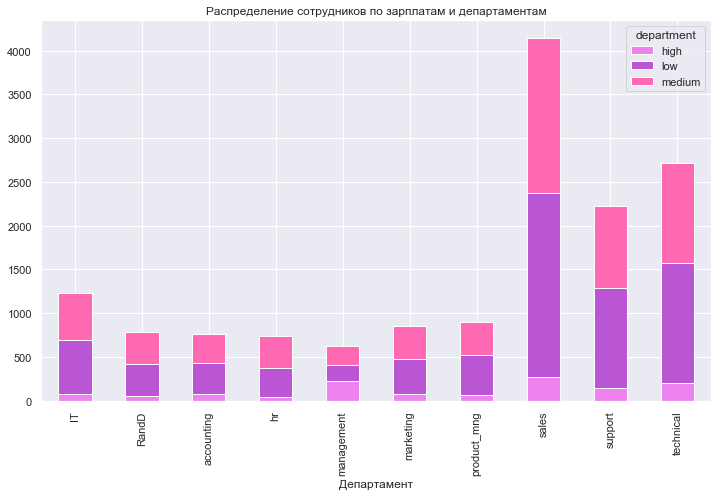

In [100]:
colors = ['violet','mediumorchid','hotpink']

pivot_df.plot.bar(stacked=True, color=colors, figsize=(12,7))
_ = plt.title('Распределение сотрудников по зарплатам и департаментам')
_ = plt.xlabel('Департамент')

# Рассмотрим взаимосвязи между переменными

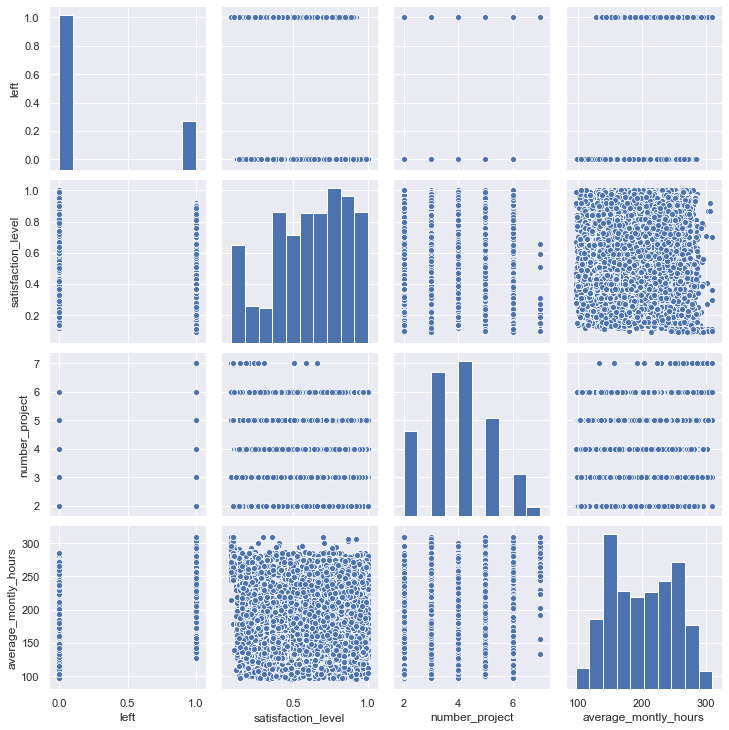

In [41]:
sns.pairplot(data, vars=['left', 'satisfaction_level', 'number_project', 'average_montly_hours'], kind="scatter")

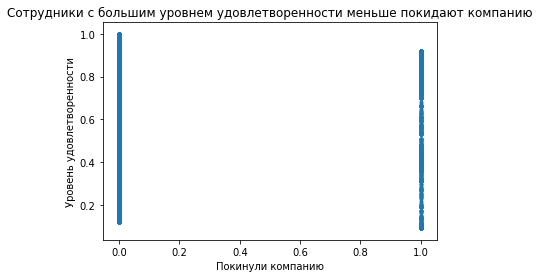

In [71]:
x = data.left
y = data.satisfaction_level

plt.scatter(x,y, marker = '.')
_ = plt.xlabel('Покинули компанию')
_ = plt.ylabel('Уровень удовлетворенности')
_ = plt.title('Сотрудники с большим уровнем удовлетворенности меньше покидают компанию')

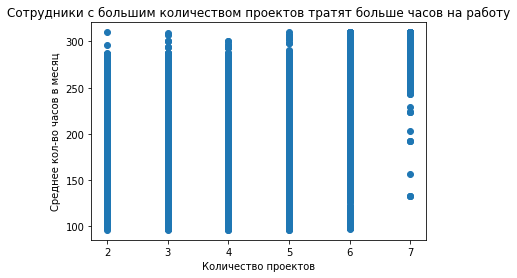

In [73]:
x = data.number_project
y = data.average_montly_hours

plt.scatter(x,y)
_ = plt.xlabel('Количество проектов')
_ = plt.ylabel('Среднее кол-во часов в месяц')
_ = plt.title('Сотрудники с большим количеством проектов тратят больше часов на работу')

# Протестируем гипотезу, что те, кто не получал повышения последние 5 лет, увольняются чаще

In [90]:
# 1

nopromo = data[data['promotion_last_5years']==0].left
yespromo = data[data['promotion_last_5years']!=0].left

stats.ttest_ind(nopromo, yespromo, equal_var=False)


Ttest_indResult(statistic=13.280405499117876, pvalue=4.1914719066819654e-33)

In [84]:
# 2

nopromo = data[data['promotion_last_5years']==0].left
yespromo = data[data['promotion_last_5years']!=0].left

descriptives, results = rp.ttest(nopromo, yespromo)
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left  14680.0  0.241962  0.428286  0.003535   0.235033  0.248891
1      left    319.0  0.059561  0.237044  0.013272   0.033449  0.085673
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.1824
1        Degrees of freedom =   14997.0000
2                         t =       7.5812
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       0.4291
7                 Hedge's g =       0.4290
8             Glass's delta =       0.4259
9                         r =       0.0618


Так как pvalue < 0.05, мы можем сказать, что имеется значительное статистическое отличие между выборками, разница медиан в выборках неслучайна. Гипотезу о равенстве отвергаем.

# Протестируем гипотезу, что сотрудники с низким уровнем удовлетворения увольняются чаще

In [92]:
# 1

highsatisfaction = data[data['satisfaction_level']>=0.64].left
lowsatisfaction = data[data['satisfaction_level']<0.64].left

stats.ttest_ind(highsatisfaction, lowsatisfaction, equal_var=False)

Ttest_indResult(statistic=-34.23101939843229, pvalue=6.089369777563619e-246)

In [93]:
# 2

highsatisfaction = data[data['satisfaction_level']>=0.64].left
lowsatisfaction = data[data['satisfaction_level']<0.64].left

descriptives, results = rp.ttest(highsatisfaction, lowsatisfaction)
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   7665.0  0.125114  0.330870  0.003779   0.117706  0.132522
1      left   7334.0  0.356149  0.478893  0.005592   0.345187  0.367111
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_______________________________________
            Independent t-test     results
0  Difference (left - left) =      -0.2310
1        Degrees of freedom =   14997.0000
2                         t =     -34.4993
3     Two side test p value =       0.0000
4    Difference < 0 p value =       0.0000
5    Difference > 0 p value =       1.0000
6                 Cohen's d =      -0.5635
7                 Hedge's g =      -0.5635
8             Glass's delta =      -0.6983
9                         r =       0.2712


Так как pvalue < 0.05, мы можем сказать, что имеется значительное статистическое отличие между выборками, гипотезу о равенстве отвергаем. Сотрудники с низким уровнем удовлетворенности увольняются чаще.

# Протестируем гипотезу, что те, кто получает низкую зарплату, увольняются чаще

In [97]:
# 1

lowsalary = data[data['salary']=='low'].left
notlowsalary = data[data['salary']!='low'].left

stats.ttest_ind(lowsalary, notlowsalary, equal_var=False)

Ttest_indResult(statistic=16.582154680277156, pvalue=3.482576135399752e-61)

In [96]:
# 2
lowsalary = data[data['salary']=='low'].left
notlowsalary = data[data['salary']!='low'].left

descriptives, results = rp.ttest(lowsalary, notlowsalary)
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   7316.0  0.296884  0.456916  0.005342   0.286412  0.307355
1      left   7683.0  0.182090  0.385944  0.004403   0.173459  0.190722
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.1148
1        Degrees of freedom =   14997.0000
2                         t =      16.6501
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       0.2720
7                 Hedge's g =       0.2720
8             Glass's delta =       0.2512
9                         r =       0.1347


Так как pvalue < 0.05, мы можем сказать, что имеется значительное статистическое отличие между выборками, гипотезу о равенстве отвергаем. Текучка среди сотрудников с низкой зарплатой выше.

# Протестируем гипотезу, что те, кто работает в Sales, увольняются чаще

In [98]:
salesdept = data[data['sales']=='sales'].left
notsalesdept = data[data['sales']!='sales'].left

descriptives, results = rp.ttest(salesdept, notsalesdept)
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   4140.0  0.244928  0.430096  0.006684   0.231822  0.258033
1      left  10859.0  0.235473  0.424314  0.004072   0.227491  0.243454
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.0095
1        Degrees of freedom =   14997.0000
2                         t =       1.2153
3     Two side test p value =       0.2243
4    Difference < 0 p value =       0.8879
5    Difference > 0 p value =       0.1121
6                 Cohen's d =       0.0222
7                 Hedge's g =       0.0222
8             Glass's delta =       0.0220
9                         r =       0.0099


Так как pvalue < 0.05, мы можем сказать, что имеется статистическое отличие между выборками, сотрудники в отделе Sales увольняются чаще.